In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
import gzip

def parse(path):
  g = gzip.open(path, 'rt', encoding='utf-8')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

review_data = getDF('Data/AMAZON_FASHION.json.gz')
data_set = review_data[:1000]
data_set

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3,NaN,NaN
2,4.0,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2.0,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3.0,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.0,True,"12 31, 2017",A2IDADN6MFU920,B00066G516,Amazon Customer,Worked perfect for my and my bridesmaid's wedd...,Worked perfect for my and my bridesmaid's wedd...,1514678400,NaN,"{'Size:': ' One Size', 'Color:': ' Black'}",NaN
996,5.0,True,"12 26, 2017",A1T9RFFJABU9U5,B00066G516,C. Parvin,Comfortable and cute.,Five Stars,1514246400,NaN,"{'Size:': ' One Size', 'Color:': ' White'}",NaN
997,4.0,True,"12 20, 2017",ACBTB3ULHQH4N,B00066G516,Amazon Customer,Great for a costume,Four Stars,1513728000,NaN,"{'Size:': ' One Size', 'Color:': ' White'}",NaN
998,5.0,True,"12 19, 2017",A3AZKZY59PI61K,B00066G516,Tracy,cute,Five Stars,1513641600,NaN,"{'Size:': ' One Size', 'Color:': ' White'}",NaN


In [43]:
data_set.drop(['reviewTime', 'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote', 'image'], axis=1,inplace=True)

In [44]:
data_set

,overall,verified,reviewerID,asin
0,5.0,True,A1D4G1SNUZWQOT,7106116521
1,2.0,True,A3DDWDH9PX2YX2,7106116521
2,4.0,False,A2MWC41EW7XL15,7106116521
3,2.0,True,A2UH2QQ275NV45,7106116521
4,3.0,False,A89F3LQADZBS5,7106116521
...,...,...,...,...
995,5.0,True,A2IDADN6MFU920,B00066G516
996,5.0,True,A1T9RFFJABU9U5,B00066G516
997,4.0,True,ACBTB3ULHQH4N,B00066G516
998,5.0,True,A3AZKZY59PI61K,B00066G516


In [45]:
data_set.dtypes

overall       float64
verified         bool
reviewerID     object
asin           object
dtype: object

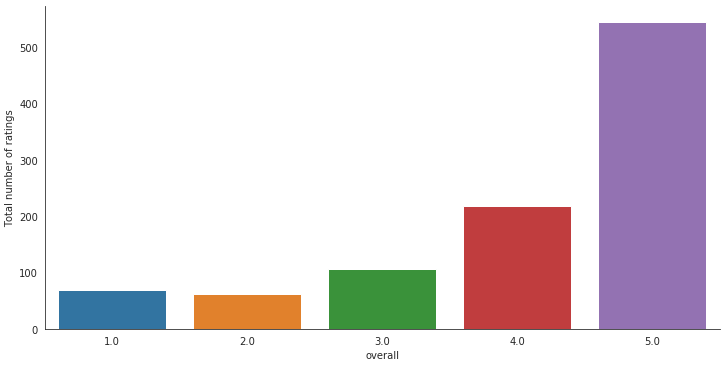

In [47]:
with sns.axes_style('white'):
    g = sns.factorplot("overall", data=data_set, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [48]:
stars = data_set['overall'].value_counts(sort=True)
stars

5.0    545
4.0    218
3.0    106
1.0     69
2.0     62
Name: overall, dtype: int64